In [243]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('얍💢')

얍💢


In [245]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [246]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [247]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [248]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [249]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

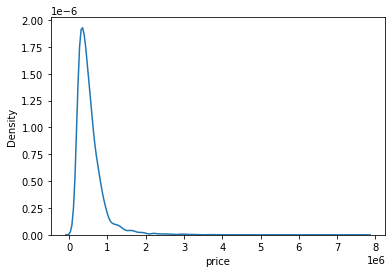

In [250]:
sns.kdeplot(y)
plt.show()

In [251]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

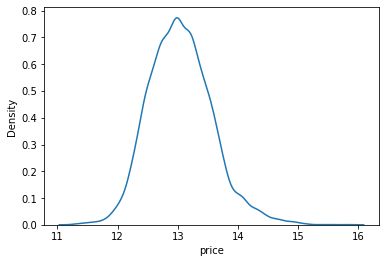

In [252]:
sns.kdeplot(y)
plt.show()

In [253]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('얍💢')

얍💢


In [255]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('얍💢')

얍💢


In [256]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('얍💢')

얍💢


In [270]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)
#ExtraTrees = ExtraTreesClassifier(n_estimators=10)
BagClas = BaggingClassifier(n_estimators=10)
#ada = AdaBoostClassifier()
#gaus = GaussianNB()

models = [gboost, xgboost, lightgbm, rdforest]

print('얍💢')

얍💢


In [271]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [125]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

In [126]:
from sklearn.model_selection import GridSearchCV

# max_depth = 의사 결정 나무의 깊이, 정수 사용(너무 큰 값이면 fit 시간이 굉장히 오래 걸림)
# n_estimators = 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용 
# num_leaves = 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수

In [274]:
param_grid = {
    'n_estimators': [900,1100,1200,1300,1500],
    'max_depth': [5,6,7,8,4,3,2],
    'num_leaves' : [13,14,15,16,17,18],
    'learning_rate' : [0.001,0.1],

}

# 위의 파라미터 조작해야 실제 폴더가 나옴!

###리스트기 때문에 하나하나 적어준다

# 일반적인 균형트리분할 (Level Wise) 방식과 달리 리프중심 트리분할(Leaf Wise) 방식을 사용합니다.
## 리프중심 트리분할의 경우 최대 손실 값을 가지는 리프노드를 지속적으로 분할하면서
## 트리가 깊어지고 비대칭적으로 생성합니다. 이로써 예측 오류 손실을 최소화하고자 합니다.

In [275]:
model = LGBMRegressor(random_state=random_state)

# 밑의 코드 Fit 기다려야 함 

In [276]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'max_depth': [5, 6, 7, 8, 4, 3, 2],
                         'n_estimators': [900, 1100, 1200, 1300, 1500],
                         'num_leaves': [13, 14, 15, 16, 17, 18]},
             scoring='neg_mean_squared_error', verbose=1)

# 위의 코드 fit 기다려야 함

In [277]:
grid_model.cv_results_

{'mean_fit_time': array([4.2857182 , 3.89524713, 4.06014929, 4.83848014, 3.85951223,
        4.70831447, 4.94952235, 5.32812271, 5.00585752, 5.61670465,
        5.54152331, 5.87728186, 4.88358836, 5.77928414, 5.94449716,
        5.68548813, 6.27681098, 5.27294197, 5.55929914, 6.10575542,
        6.34286876, 5.83076029, 6.31726632, 6.2574162 , 6.68394313,
        7.0478106 , 7.13924999, 6.44651904, 7.55710011, 7.40971031,
        4.05795631, 4.16396275, 4.33896194, 4.66518402, 4.74913416,
        4.59628291, 5.13803787, 5.85937486, 4.74131351, 5.64323287,
        5.63671618, 5.35827575, 5.50487342, 5.99999208, 5.68176064,
        5.91148047, 6.95095906, 6.94513745, 5.33133745, 5.81248055,
        6.08944168, 7.1087162 , 6.56691084, 6.53483233, 6.69189672,
        6.96626778, 7.09250369, 7.66722007, 7.20163984, 7.61438065,
        4.69185491, 4.33313656, 4.14901071, 4.41226082, 4.58266096,
        4.84539771, 4.98399534, 5.61798587, 5.26318026, 6.39761009,
        5.19120526, 5.39776573,

In [278]:
params = grid_model.cv_results_['params']
params

[{'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 900,
  'num_leaves': 13},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 900,
  'num_leaves': 14},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 900,
  'num_leaves': 15},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 900,
  'num_leaves': 16},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 900,
  'num_leaves': 17},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 900,
  'num_leaves': 18},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 1100,
  'num_leaves': 13},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 1100,
  'num_leaves': 14},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 1100,
  'num_leaves': 15},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 1100,
  'num_leaves': 16},
 {'learning_rate': 0.001,
  'max_depth': 5,
  'n_estimators': 1100,
  'num_leaves': 17},
 {'learning_rate': 0.001,
 

In [279]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.10022391, -0.09910581, -0.09812433, -0.09723225, -0.09644214,
       -0.09574215, -0.08548034, -0.08435994, -0.08338976, -0.08250405,
       -0.08169541, -0.08098556, -0.07960487, -0.07851692, -0.07757236,
       -0.07670802, -0.07589667, -0.07518693, -0.07454269, -0.07348076,
       -0.07256661, -0.07170763, -0.07091317, -0.07022774, -0.06626576,
       -0.06524466, -0.06441735, -0.06362358, -0.06288636, -0.06223554,
       -0.10011509, -0.09900572, -0.09801155, -0.0970187 , -0.09616559,
       -0.09536164, -0.08534062, -0.0842133 , -0.08320258, -0.08222389,
       -0.08135182, -0.08054021, -0.0794566 , -0.07836183, -0.07736235,
       -0.07640083, -0.07554064, -0.07473413, -0.07438956, -0.07331394,
       -0.07233334, -0.0713847 , -0.07052938, -0.06974193, -0.06608281,
       -0.06504634, -0.0641598 , -0.06327271, -0.06243299, -0.06167363,
       -0.10011578, -0.09899988, -0.09800778, -0.09700916, -0.09613393,
       -0.09533511, -0.08534298, -0.08420564, -0.08319091, -0.08

In [280]:
# 여기에 코드를 작성하세요.
results = pd.DataFrame(params)
results['score'] = score

results

,learning_rate,max_depth,n_estimators,num_leaves,score
0,0.001,5,900,13,-0.100224
1,0.001,5,900,14,-0.099106
2,0.001,5,900,15,-0.098124
3,0.001,5,900,16,-0.097232
4,0.001,5,900,17,-0.096442
...,...,...,...,...,...
415,0.100,2,1500,14,-0.026943
416,0.100,2,1500,15,-0.026943
417,0.100,2,1500,16,-0.026943
418,0.100,2,1500,17,-0.026943


In [281]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,learning_rate,max_depth,n_estimators,num_leaves,score,RMSE
0,0.001,5,900,13,-0.100224,0.316582
1,0.001,5,900,14,-0.099106,0.314811
2,0.001,5,900,15,-0.098124,0.313248
3,0.001,5,900,16,-0.097232,0.311821
4,0.001,5,900,17,-0.096442,0.310551
...,...,...,...,...,...,...
415,0.100,2,1500,14,-0.026943,0.164144
416,0.100,2,1500,15,-0.026943,0.164144
417,0.100,2,1500,16,-0.026943,0.164144
418,0.100,2,1500,17,-0.026943,0.164144


In [282]:
## RMSLE 는 under estimation 일 때 (예측값이 실제값보다 작을때) 더 높은 페널티가 주어집니다 

In [283]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
0,0.001,5,900,13,-0.100224,0.316582
1,0.001,5,900,14,-0.099106,0.314811
2,0.001,5,900,15,-0.098124,0.313248
3,0.001,5,900,16,-0.097232,0.311821
4,0.001,5,900,17,-0.096442,0.310551
...,...,...,...,...,...,...
415,0.100,2,1500,14,-0.026943,0.164144
416,0.100,2,1500,15,-0.026943,0.164144
417,0.100,2,1500,16,-0.026943,0.164144
418,0.100,2,1500,17,-0.026943,0.164144


In [284]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
results = results.sort_values('RMSLE')
results.to_csv('/aiffel/aiffel/10101.csv')
results

# results.to_excel(results)
# submission_path1 = join(data_dir, 'sample_submission.csv')

# prediction1 = np.expm1(results)
# submission1 = pd.read_csv(submission_path1)
# print(prediction1)
# submission1['price'] = prediction1
# submission_csv_path1 = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
# submission.to_csv(submission_csv_path1, index=False)
# print('{} saved!'.format(submission_csv_path1))

,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
242,0.100,6,900,15,-0.025895,0.160920
270,0.100,7,900,13,-0.025941,0.161062
273,0.100,7,900,16,-0.025968,0.161145
276,0.100,7,1100,13,-0.025984,0.161196
211,0.100,5,900,14,-0.025985,0.161199
...,...,...,...,...,...,...
182,0.001,2,900,15,-0.131082,0.362053
183,0.001,2,900,16,-0.131082,0.362053
184,0.001,2,900,17,-0.131082,0.362053
180,0.001,2,900,13,-0.131082,0.362053


In [222]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다. 
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
"""

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

# 밑 코드 기다려야 함

In [223]:
param_grid = {
    'n_estimators': [900,1100,1400,950],
    'max_depth': [9,8,7,2,3,10],
    'num_leaves' : [12,13,14,15,16,17,18],
    'learning_rate' : [0.0001,0.001,0.1],
    
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=900, num_leaves=12; total time=   3.4s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=900, num_leaves=13; total time=   3.7s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=900, num_leaves=13; total time=   6.8s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=900, num_leaves=15; total time=   5.2s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=900, num_leaves=16; total time=   5.2s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=900, num_leaves=17; total time=   4.3s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=900, num_leaves=18; total time=   4.3s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=1100, num_leaves=12; total time=   5.6s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=1100, num_leaves=13; total time=   6.4s
[CV] END learning_rate=0.0001, max_depth=9, n_estimators=1100, num_lea

,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
414,0.1000,7,950,13,-0.025938,0.161051
393,0.1000,7,900,13,-0.025941,0.161062
479,0.1000,10,900,15,-0.025947,0.161081
477,0.1000,10,900,13,-0.025964,0.161135
396,0.1000,7,900,16,-0.025968,0.161145
...,...,...,...,...,...,...
88,0.0001,2,900,16,-0.253168,0.503158
87,0.0001,2,900,15,-0.253168,0.503158
86,0.0001,2,900,14,-0.253168,0.503158
85,0.0001,2,900,13,-0.253168,0.503158


[CV] END learning_rate=0.1, max_depth=2, n_estimators=900, num_leaves=17; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=900, num_leaves=18; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1100, num_leaves=12; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1100, num_leaves=14; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1100, num_leaves=15; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1100, num_leaves=15; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1100, num_leaves=16; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1100, num_leaves=17; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1100, num_leaves=18; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1400, num_leaves=12; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=1400, nu

# 위 코드 기다려야 함

In [231]:
model = LGBMRegressor(max_depth=10, n_estimators=900,num_leaves = 13,learning_rate = 0.1, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.12234846, 13.07389441, 14.11737077, ..., 13.103447  ,
       12.68588605, 12.9955016 ])

In [232]:
prediction = np.expm1(prediction)
prediction

array([ 499991.54045082,  476342.45003989, 1352371.16299873, ...,
        490629.70589496,  323153.57705204,  440426.70731718])

In [233]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [234]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,4.999915e+05
1,15036,4.763425e+05
2,15037,1.352371e+06
3,15038,2.890422e+05
4,15039,3.197451e+05


In [235]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv


In [236]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [230]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.0168.csv saved!
